In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Reading the data
df=pd.read_csv("https://raw.githubusercontent.com/vasani05/LendingClubCaseStudy/master/loan.csv")

C:\Users\vasan\AppData\Local\Temp\ipykernel_360816\855514581.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("https://raw.githubusercontent.com/vasani05/LendingClubCaseStudy/master/loan.csv")


In [6]:
#Number of rows and columns
df.shape

(39717, 111)

In [91]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [92]:
# Removing all the columns with NA values
df.dropna(axis=1,how="all",inplace=True)
df.shape

(39717, 57)

In [93]:
# Removing the following columns because those columns are not revealnt for this study. 
cols_to_drop=["emp_title", "desc", "zip_code","issue_d","pymnt_plan", "url","title","mths_since_last_delinq",
             "mths_since_last_record","initial_list_status","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
             "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d",
              "last_credit_pull_d","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq",
              "delinq_amnt","tax_liens","chargeoff_within_12_mths"]

In [94]:
# Dropping the columns as mentioned in the cols_to_drop
df.drop(columns=cols_to_drop,inplace=True)

In [95]:
#Shape after dropping the columns
df.shape

(39717, 29)

In [96]:
#Checking the null values
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
out_prncp                  0
out_prncp_inv              0
pub_rec_bankruptcies     697
dtype: int64

There are about 1075 (2.7%) null values in the emp_length and 50 (0.13%) in revol_util, hence we would remove that rows. 

In [97]:
#Removing all the rows with null value in the emp_length column. 
df=df[~(df["emp_length"].isnull())]

In [98]:
#Removing all the rows with null value in the revol_util column.
df=df[~(df["revol_util"].isnull())]

In [99]:
#Filling pub_rec_bankruptcies NaN with Others
df.pub_rec_bankruptcies.fillna("Not Available",inplace=True)

In [100]:
#Checking the null values in the dataset
df.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
out_prncp               0
out_prncp_inv           0
pub_rec_bankruptcies    0
dtype: int64

Now there are no null data in the data set. For further cleaning we would examine the datatype of the individaul columns and make certain changes if required.  

In [101]:
# We would be converting the interest rate column to float value
df["int_rate"]=df.int_rate.apply(lambda x: float(x[:-1]))

In [102]:
# We would be converting the revol_util column to float value
df.loc[:,"revol_util"]=df.revol_util.apply(lambda x: float(x[:-1]))

In [103]:
#Converting the term data in to int value
df.loc[:,"term"]=df.loc[:,"term"].apply(lambda x: int(x.split()[0]))

In [104]:
#Converting the data of pub_rec_bankruptcies into String

df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.apply(lambda x: "Zero" if x==0.0 else ("One" if x==1.0 else ("Two" if x==2.0 else "Not Available")))

## Handling the outliers

### Outliers in annual_inc

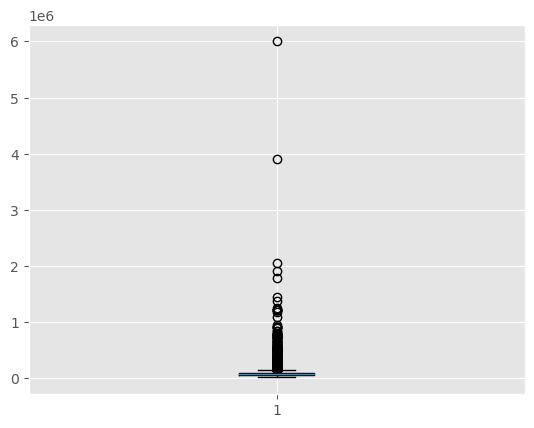

In [105]:
plt.boxplot(df["annual_inc"])
plt.show()

#### This clearly shows that there are many outliers in the column. Now lets check the various qunatile values 

#### Based on the above data we would be restricting our data to the 95 percentile 

In [106]:
df=df[df["annual_inc"]<=df["annual_inc"].quantile(0.95)]

#### Now we would be checking the other columns for the outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x18f94ff64f0>,
 'caps': [<matplotlib.lines.Line2D at 0x18f94ff6cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f94ff67f0>],
 'medians': [<matplotlib.lines.Line2D at 0x18f94ff6190>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f98866e50>],
 'means': []}

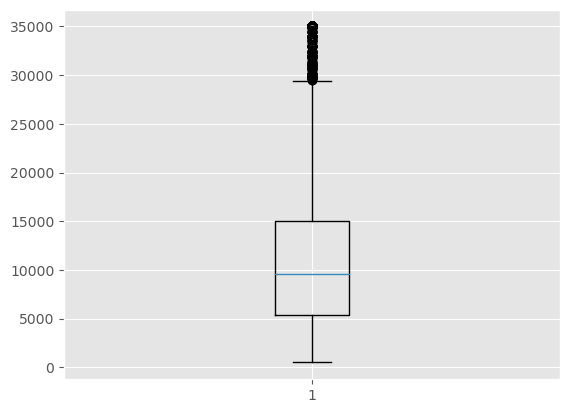

In [107]:
plt.boxplot(df["loan_amnt"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18f98951f40>,
 'caps': [<matplotlib.lines.Line2D at 0x18f99fa00d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f98951a60>],
 'medians': [<matplotlib.lines.Line2D at 0x18f99fa0dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f99fa0520>],
 'means': []}

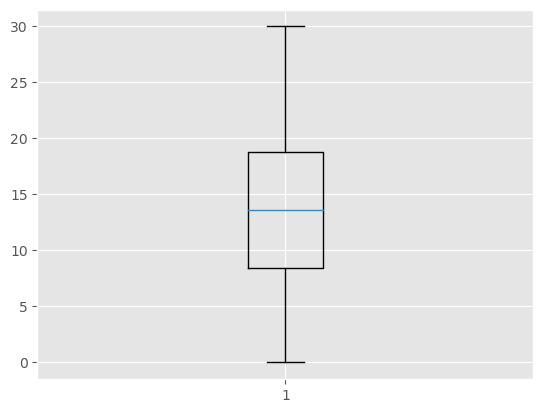

In [108]:
plt.boxplot(df["dti"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18f94f948e0>,
 'caps': [<matplotlib.lines.Line2D at 0x18f94f94dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f94f94820>],
 'medians': [<matplotlib.lines.Line2D at 0x18f99f87dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f99f87f40>],
 'means': []}

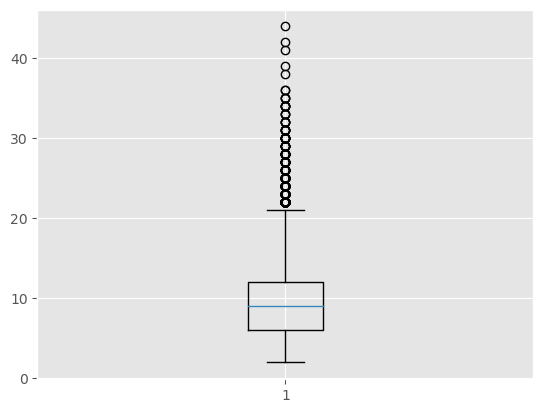

In [109]:
plt.boxplot(df["open_acc"])

#### As per the above box plot there are no significant outliers in the other continous data. 

#### Removing the loans which are still current as their loan_status since we dont know whether they will repay the loan or they would be charged off

In [110]:
df=df[~(df["loan_status"]=="Current")]

In [111]:
# There are 3 records which have provided their home ownership as "NONE". However, we can convert those to the "OTHER" as their
#ownership. 
df["home_ownership"].value_counts()

RENT        17619
MORTGAGE    15322
OWN          2649
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

In [112]:
index_NONE = df[df["home_ownership"]=="NONE"]["home_ownership"].index
df.loc[index_NONE,"home_ownership"]="OTHER"
df["home_ownership"].value_counts()

RENT        17619
MORTGAGE    15322
OWN          2649
OTHER          94
Name: home_ownership, dtype: int64

### Converting continous variables into categorical using Binnig

In [113]:
#Binning for loan_amnt

bins=[0,5000,10000,15000,20000,25000,36000]
loan_amnt_label=["0-5000","5000-10000","10000-15000","15000-20000","20000-25000","25000-360000"]
df["loan_amnt_range"]=pd.cut(df["loan_amnt"],bins,labels=loan_amnt_label)


In [114]:
#Binning for annual_inc

bins=[0,25000,50000,75000,100000,1000000]
bins_label=["0-25000","25000-50000","50000-75000","75000-100000","100000+"]
df["annual_inc_range"]=pd.cut(df["annual_inc"],bins,labels=bins_label)


In [115]:
#Binning for installement 
bins=[0,200,500,800,1350]
bins_label=["Low","Medium","High","Very High"]
df["installment_range"]=pd.cut(df["installment"],bins,labels=bins_label)


In [116]:
#Binning for DTI 
bins=[-0.00001,5.00,10.00,15.00,20.00,25.00,50.00]
bins_label=["0-5%","5-10%","10-15%","15-20%","20-25%","25+%"]
df["dti_range"]=pd.cut(df["dti"],bins,labels=bins_label)


In [117]:
#Binning for revol_util
bins=[-0.00001,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00,100.00]
bins_label=["0-10%","10-20%","20-30%","30-40%","40-50%","50-60%","60-70%","70-80%","80-90%","90-100%"]
df["revol_util_range"]=pd.cut(df["revol_util"],bins, labels=bins_label)

In [118]:
#Binning for total_acc total_acc
bins=[0,10,20,30,40,50,60,70,80,90,100]
bins_label=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]
df["total_acc_range"]=pd.cut(df["total_acc"],bins, labels=bins_label)

In [119]:
#Binning for int_rate
bins=[0.00,3.00,6.00,9.00,12.00,15.00,18.00,21.00,24.00,27.00]
bins_label=["0-3%","3-6%","6-9%","9-12%","12-15%","15-18%","18-21%","21-24%","24+%"]
df["int_rate_range"]=pd.cut(df["int_rate"],bins, labels=bins_label)

## Univariate Analysis

([<matplotlib.patches.Wedge at 0x18f94f8aac0>,
 [Text(-0.9872834868802686, 0.4850477466533979, 'Fully Paid'),
  Text(0.9872834641735434, -0.4850477928714735, 'Charged Off')],
 [Text(-0.5385182655710555, 0.26457149817458064, '85.5%'),
  Text(0.538518253185569, -0.26457152338444007, '14.5%')])

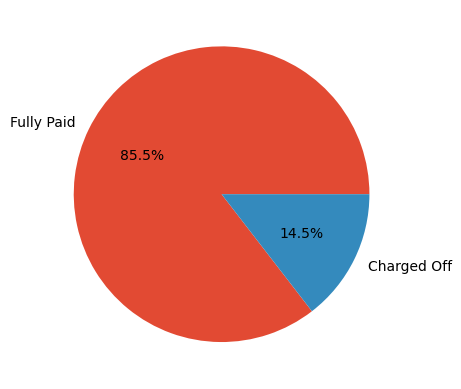

In [120]:
#Pie chart to see the distribution of the loan_status
#As seen in the chart there are about 14.5% of the loans that are charged off.
plt.pie(df["loan_status"].value_counts(),labels=df["loan_status"].value_counts().index,autopct='%1.1f%%')

#### Analysing the influence of various parameters on the loan status. 

#### Function for plotting the graph for univariate analysis

In [121]:
def graphPlotingforUnivariate(parameter, data=df, figsize=(10,5),resorted=True):
    plt.figure(figsize=figsize)
    if resorted:
        parameter_dimension=sorted(data[parameter].unique())
    else: 
        parameter_dimension=data[parameter].unique()
    parameter_value=[]
    for para in parameter_dimension:
        data_filter=data[data[parameter]==para]
        count_loan_status=len(data_filter["loan_status"])
        count_charge_off=len(data_filter[data_filter["loan_status"]=="Charged Off"])
        ratio = (count_charge_off/count_loan_status)*100
        parameter_value.append(ratio)
        
    sns.barplot(x=parameter_dimension,y=parameter_value)
    plt.style.use("ggplot")
    plt.title("Loan Defaults with respect to "+str(parameter))
    plt.xlabel(parameter,fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    
        
    

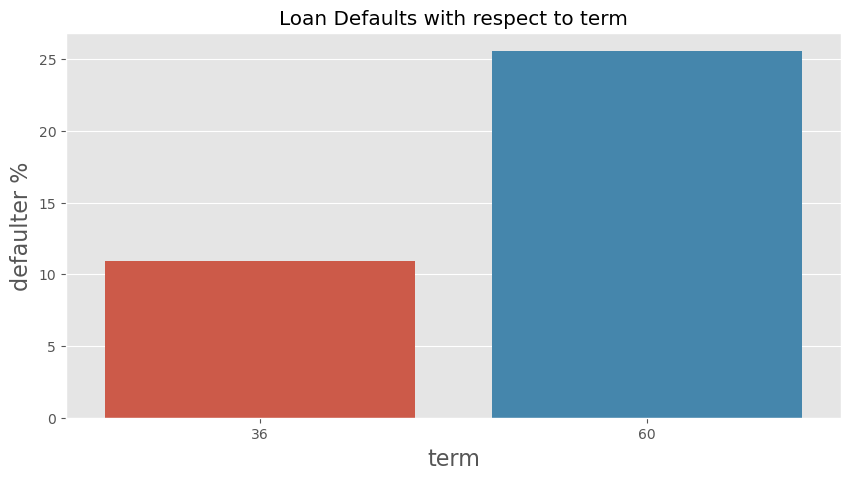

In [122]:
#Plotting defaulters percentage with respect to the loan terms.
graphPlotingforUnivariate("term")

#### It can seen from the above graph that the person who takes loan for higher terms has more chances to default than the one who it for shorter terms. 

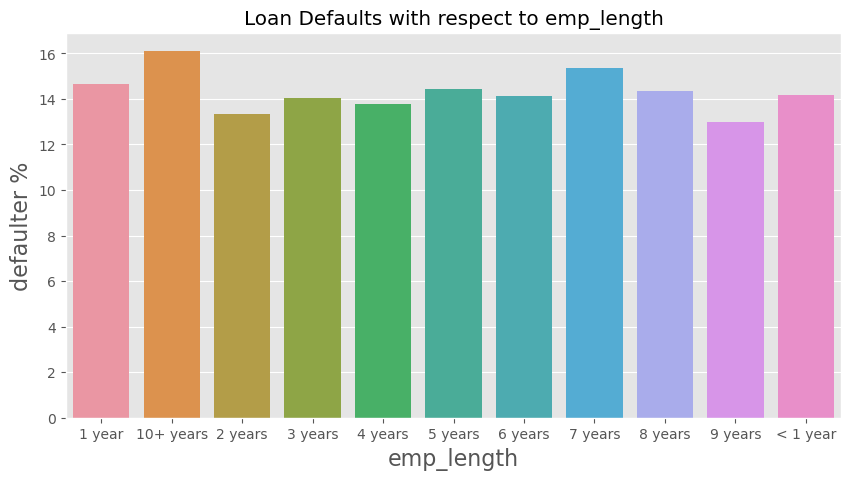

In [123]:
#Plotting defaulters percentage with respect to the Number of years person has worked in organisation.
graphPlotingforUnivariate("emp_length")

#### As depicted in the above graph, there is not much variation on the defaulters percentage with respect to the years of service they have provided in an organisation. 

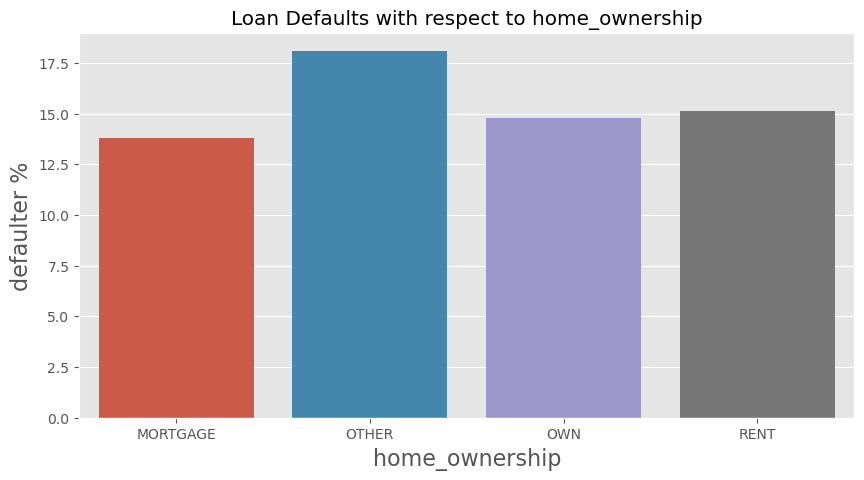

In [124]:
#Plotting defaulters percentage with respect to their home ownership.
graphPlotingforUnivariate("home_ownership")

#### As depicted in the above graph, there is not much variation on the defaulters percentage with thier home ownership

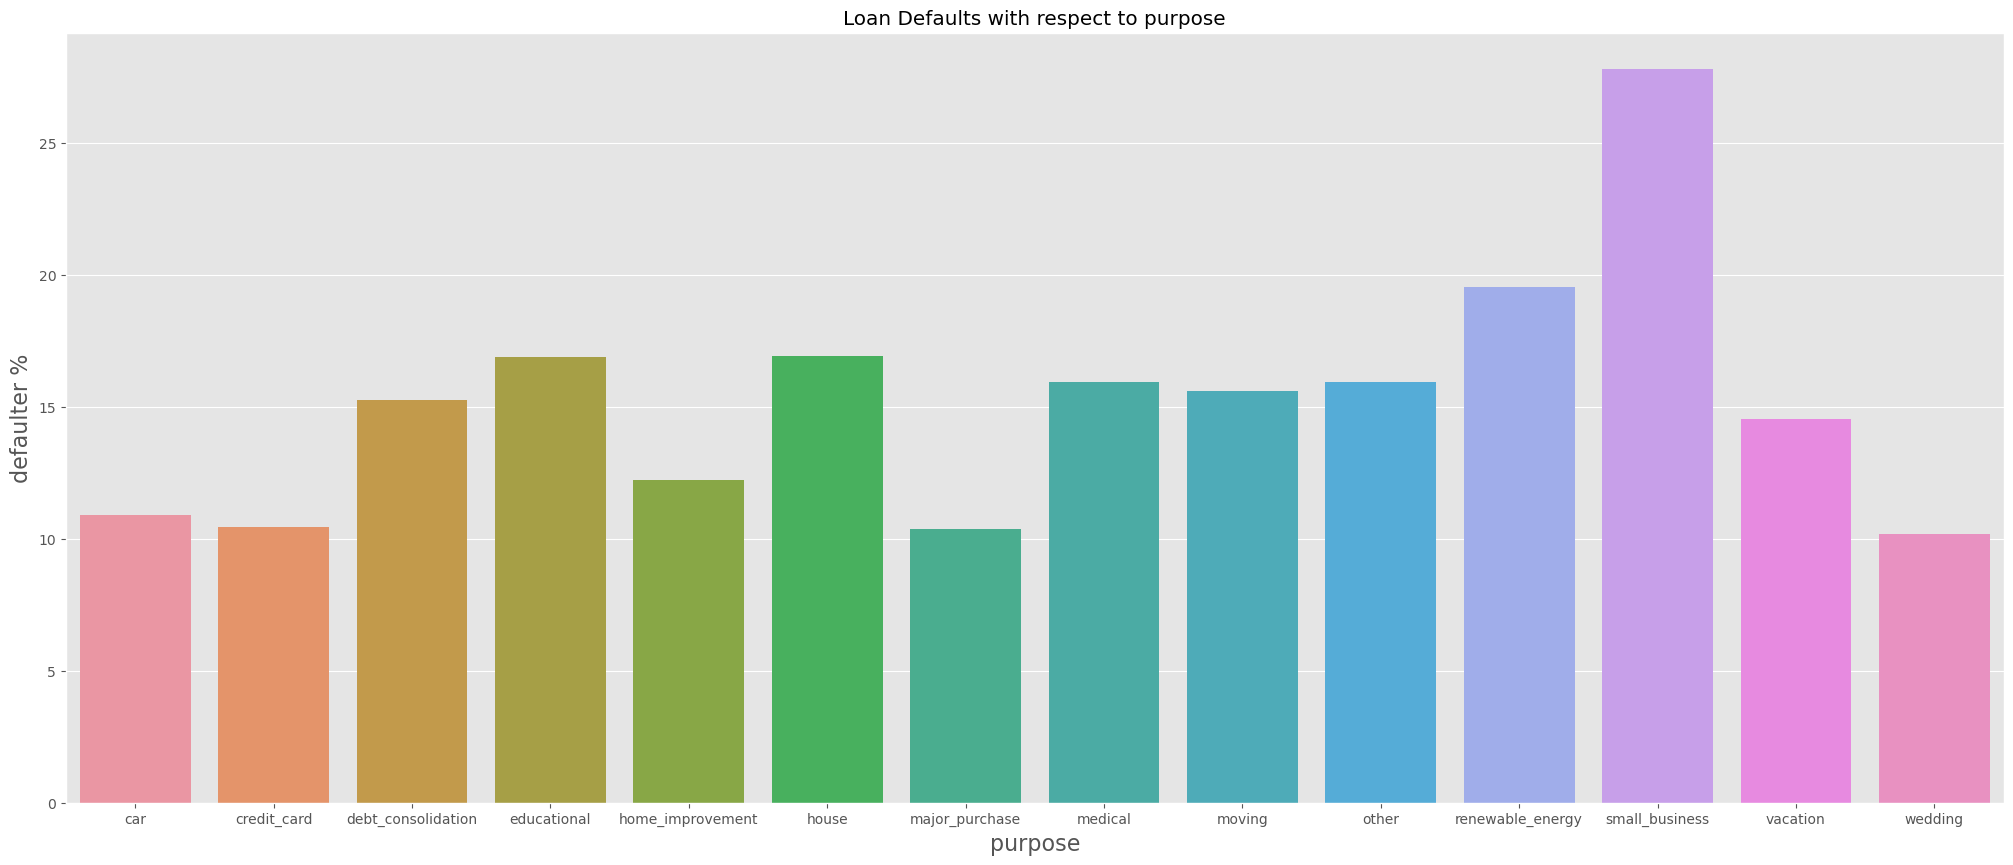

In [125]:
#Plotting defaulters percentage with respect to for what purpose they had taken loan.
graphPlotingforUnivariate("purpose",figsize=(25,10))

#### As evident from the above graph, people who take loan for running small businesses have higher chance to default as compared to others. 

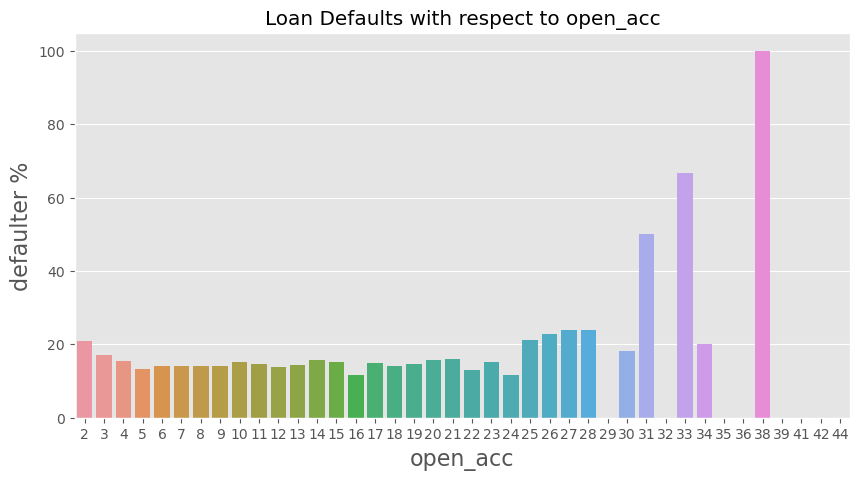

In [126]:
graphPlotingforUnivariate("open_acc")

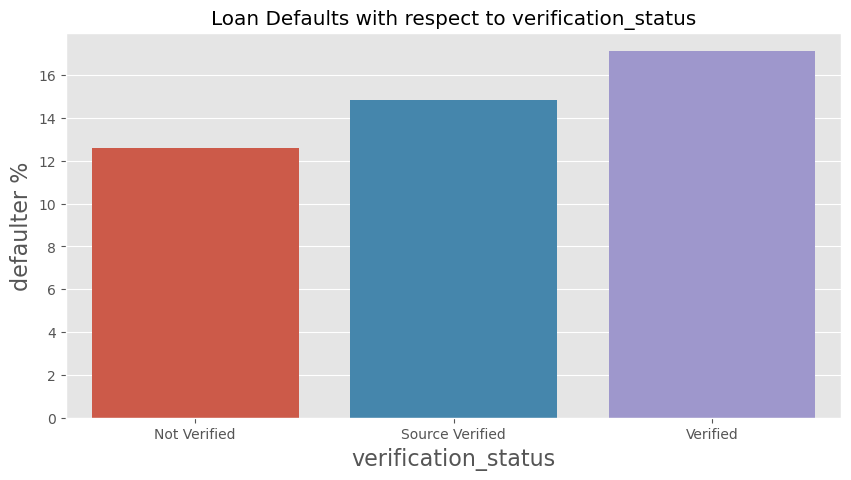

In [127]:
graphPlotingforUnivariate("verification_status")

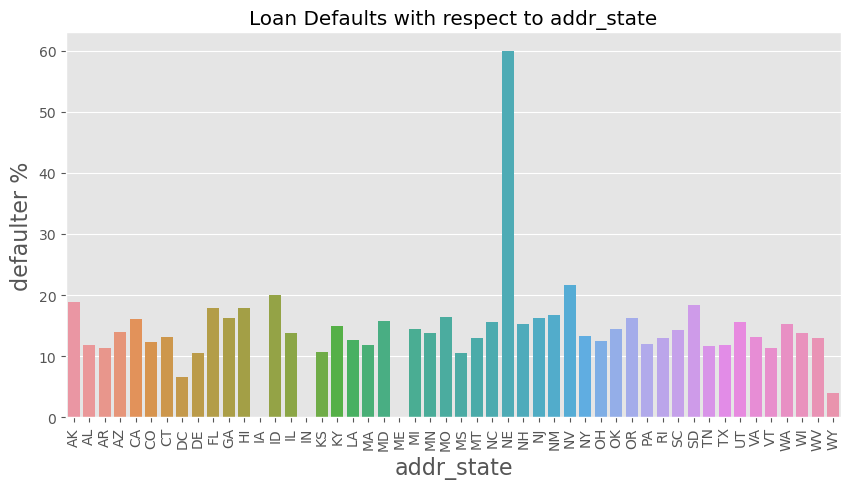

In [128]:
graphPlotingforUnivariate("addr_state")

plt.xticks(rotation=90)
plt.show()

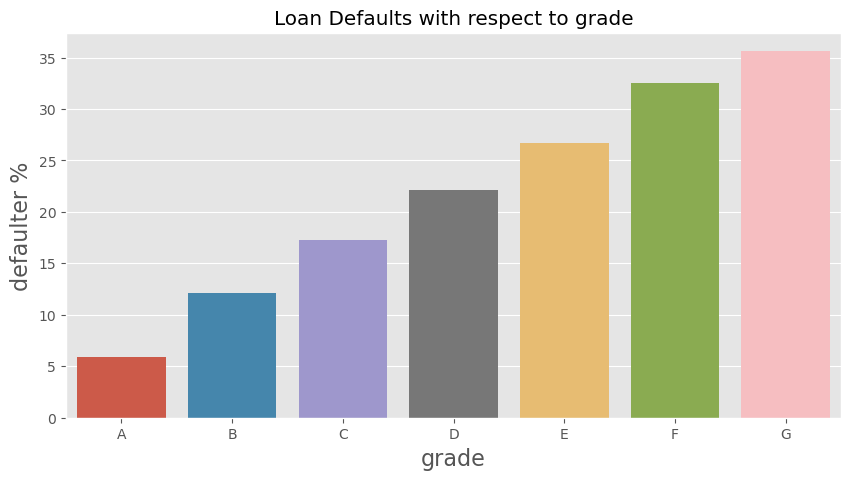

In [129]:
graphPlotingforUnivariate("grade")

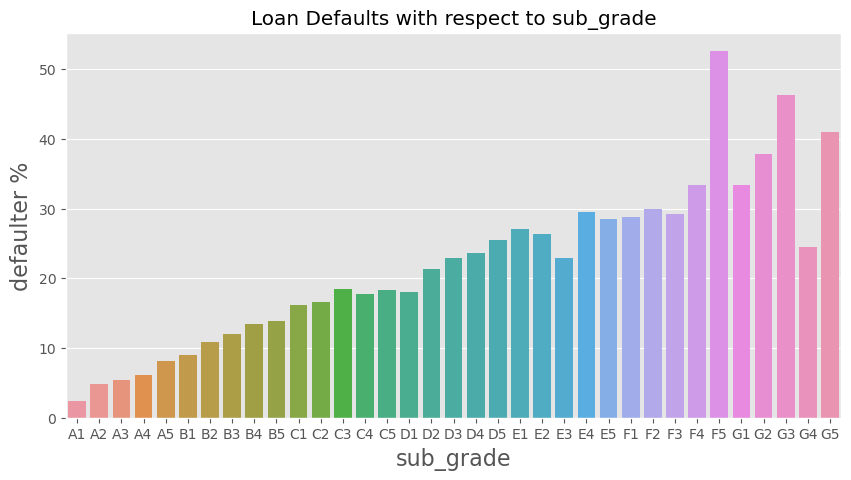

In [130]:
graphPlotingforUnivariate("sub_grade")

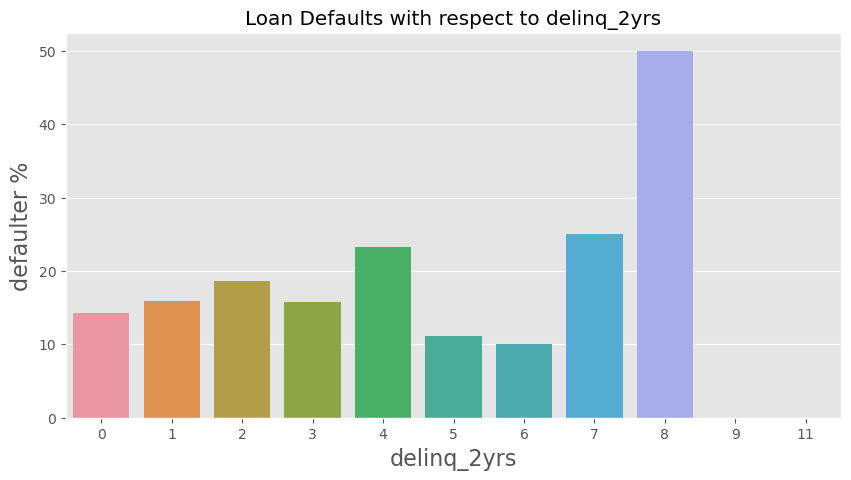

In [131]:
graphPlotingforUnivariate("delinq_2yrs")

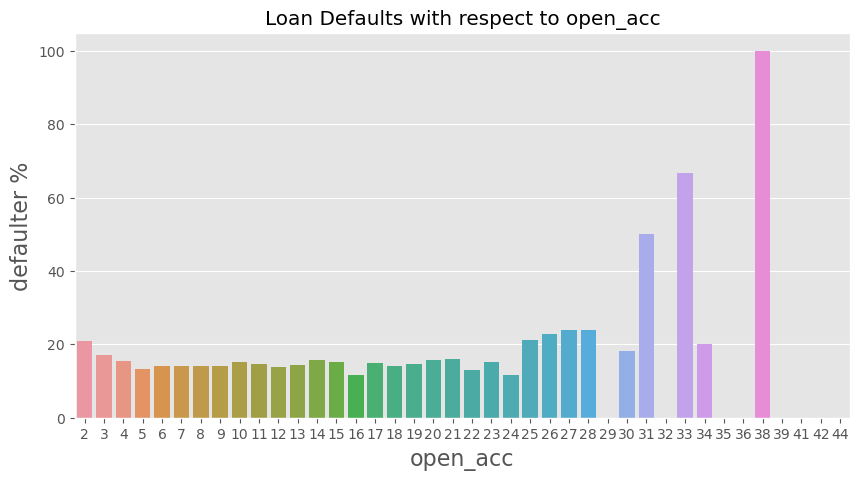

In [132]:
graphPlotingforUnivariate("open_acc")

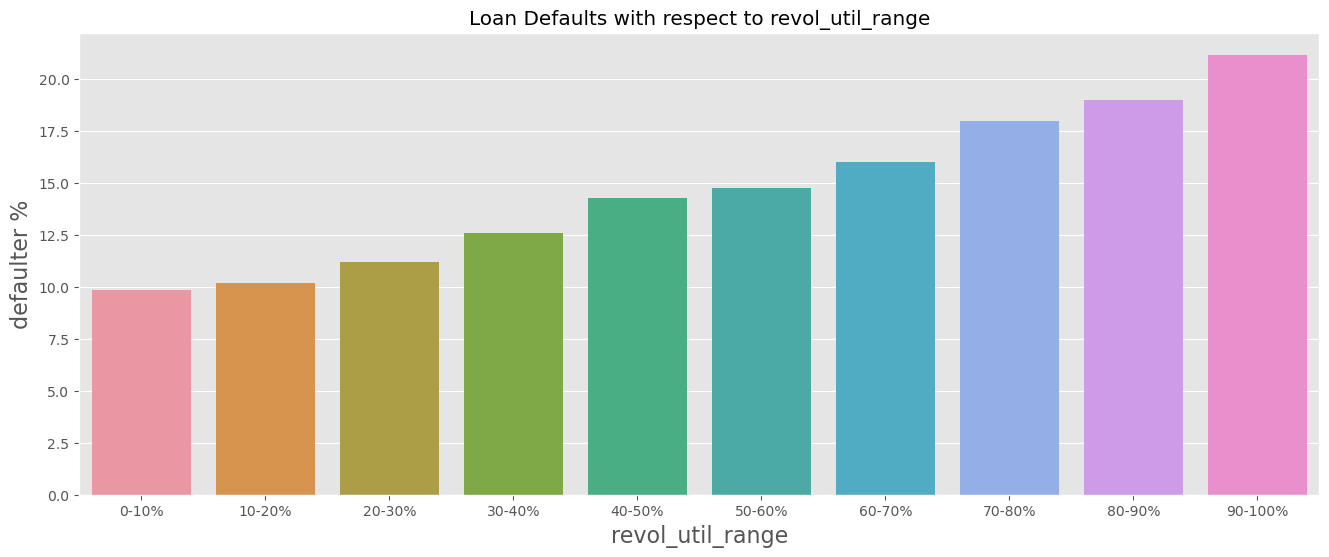

In [133]:
graphPlotingforUnivariate("revol_util_range",figsize=(16,6))

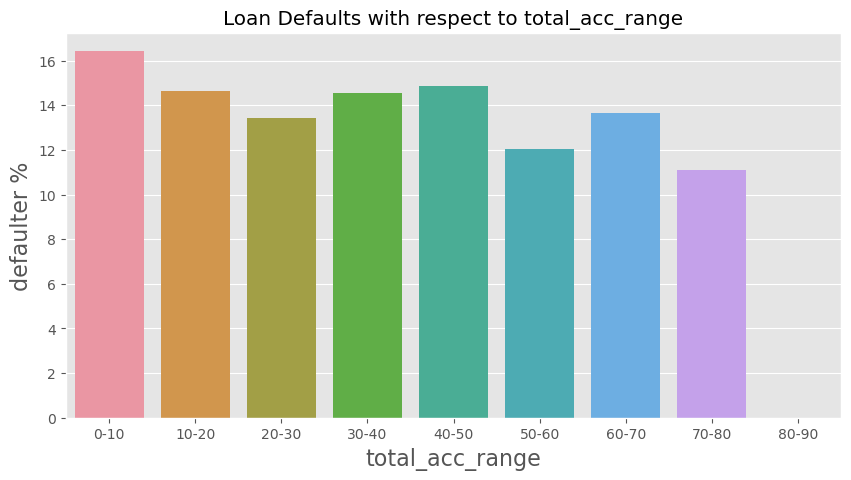

In [134]:
graphPlotingforUnivariate("total_acc_range")


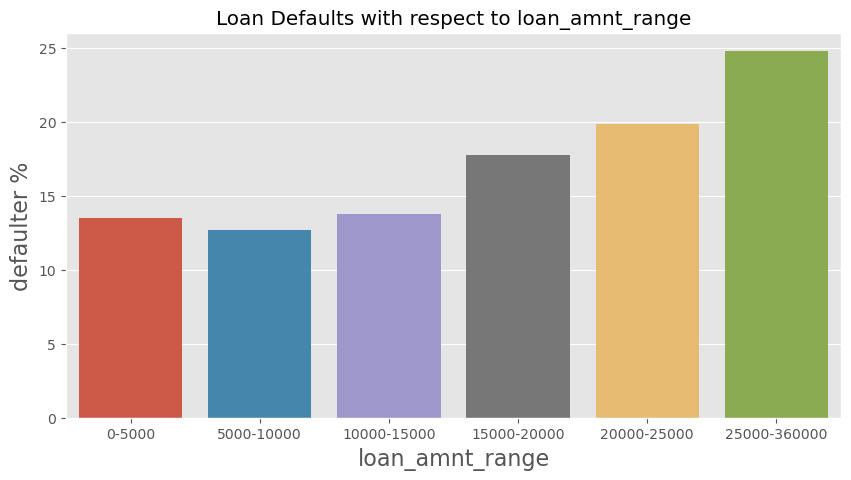

In [135]:
graphPlotingforUnivariate("loan_amnt_range",resorted=False)

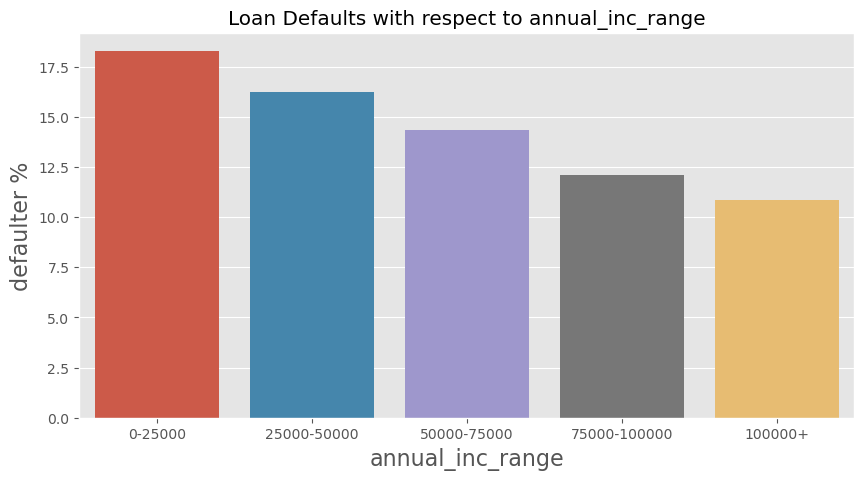

In [136]:
graphPlotingforUnivariate("annual_inc_range",resorted=False)

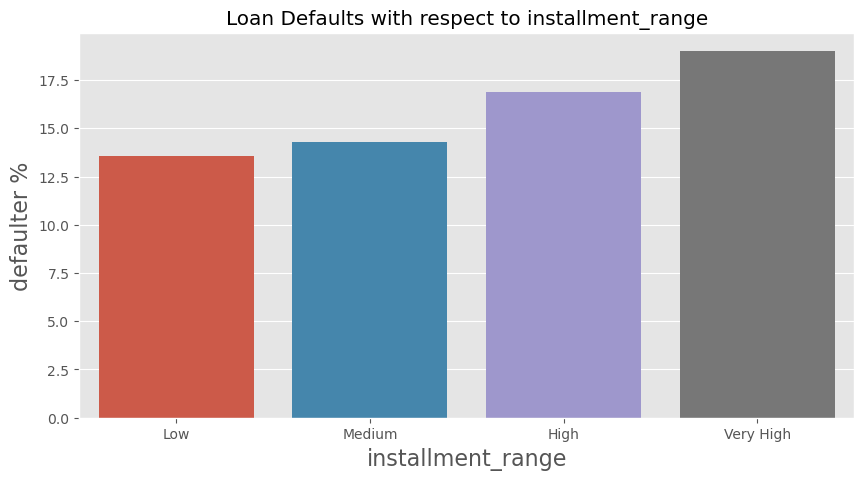

In [137]:
graphPlotingforUnivariate("installment_range",resorted=False)

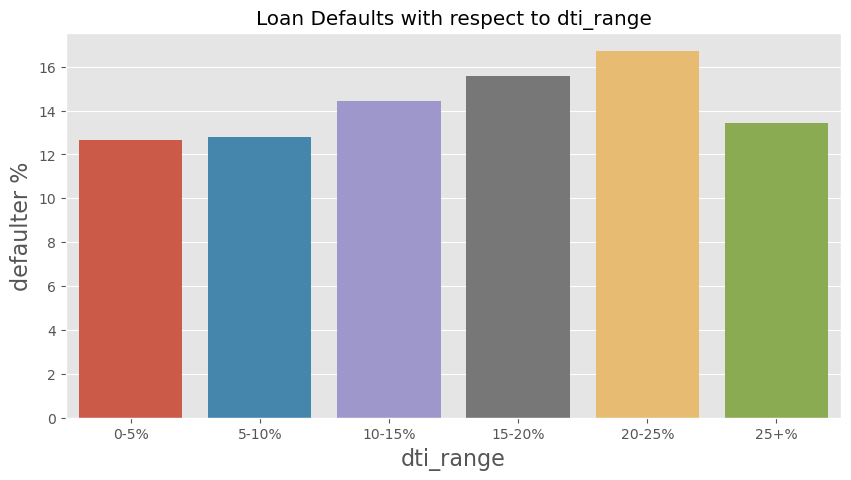

In [138]:
graphPlotingforUnivariate("dti_range",resorted=False)

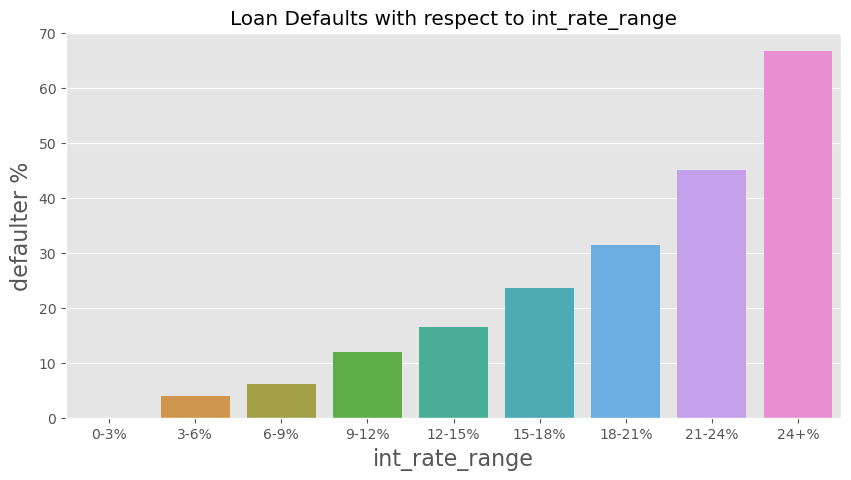

In [139]:
graphPlotingforUnivariate("int_rate_range",resorted=False)

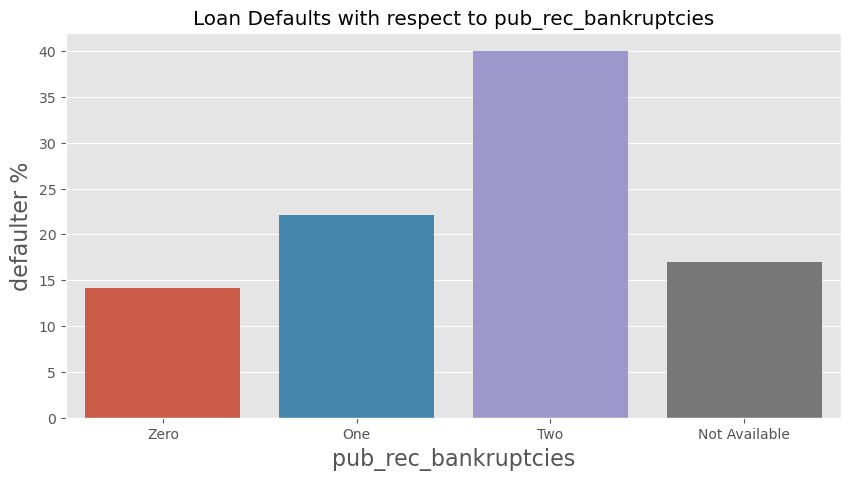

In [140]:
graphPlotingforUnivariate("pub_rec_bankruptcies",resorted=False)


#### The important feature which influences whether someone would default loan are:
1. Loan Terms- As loan term increase chances of defaul increase. 
2. Purpose- There is higher chance of default if loan is taken for small businesses. 
3. State- There are higher chances of default if loan is taken in the NE state.
4. Grade and Sub Grade- There are higher chances of default as the grade and sub grade increases. 
5. Open Account- As the open account increases the chances of default increases.
6. Revol Until- As the revol until percentge increases, the chances of default also increases.
7. Loan Amount- As the loan amount increases, the chances of default increases too.
8. Annual Income- As the annual income of person increases the chances of default decreases.
9. Installement- As the installement increases the chances of default also increases. 
10. DTI- As the debt to income ratio increase the chances of default increases.
11. Interest Rate- As the interest rate of the loan increases the chances of default also increases. 
12. Public Record of Bankruptcies- As the number of the bankruptcies increases the chances of default also increases.  

## Bivariate Analysis


In [141]:
#Defining function for plotting barplot for two variable wrt % charged off

In [142]:
def graphPlottingForBivariate(x,hue,data=df,figsize=(10,5)):
    plt.figure(figsize=figsize)
    data_group=data.groupby(by=[x,hue]).loan_status.value_counts(normalize=True)
    data_reset_index=data_group.reset_index(level=[x,hue]).loc["Charged Off",:]
    sns.barplot(data=data_reset_index, x=x, y="loan_status", hue=hue)
    plt.title(f"Loan Default Ration wrt {x} and {hue}")
    plt.xlabel(x, fontsize=14)
    plt.ylabel("defaulter ratio", fontsize=14)


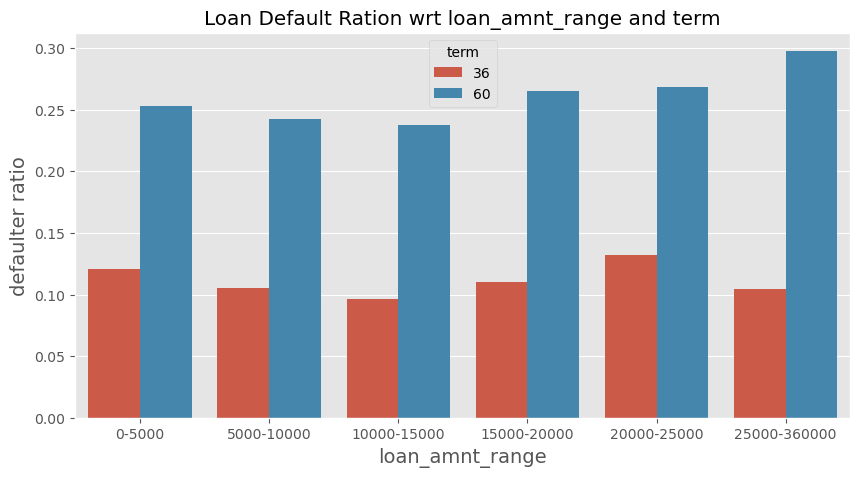

In [143]:
graphPlottingForBivariate("loan_amnt_range","term")

#### As evident from the above graph, irrespective of the loan amount people who take laon for higher terms are more likely to default. 

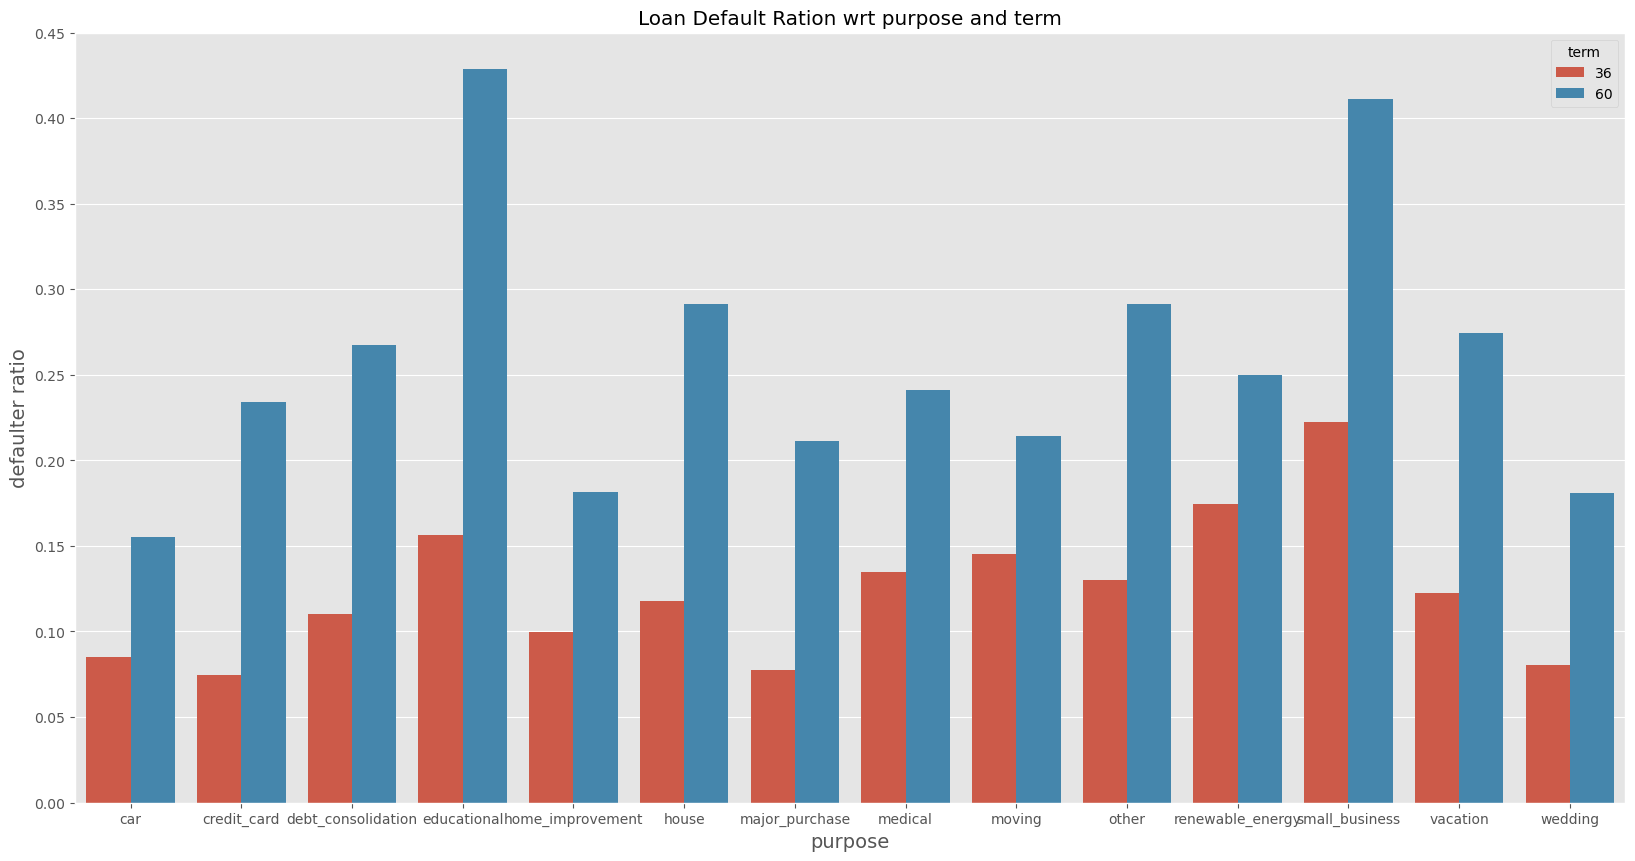

In [144]:
graphPlottingForBivariate("purpose","term",figsize=(20,10))

#### As evident from the above graph, irrespective of the purpose people who take loan for higher terms are more likely to default. 

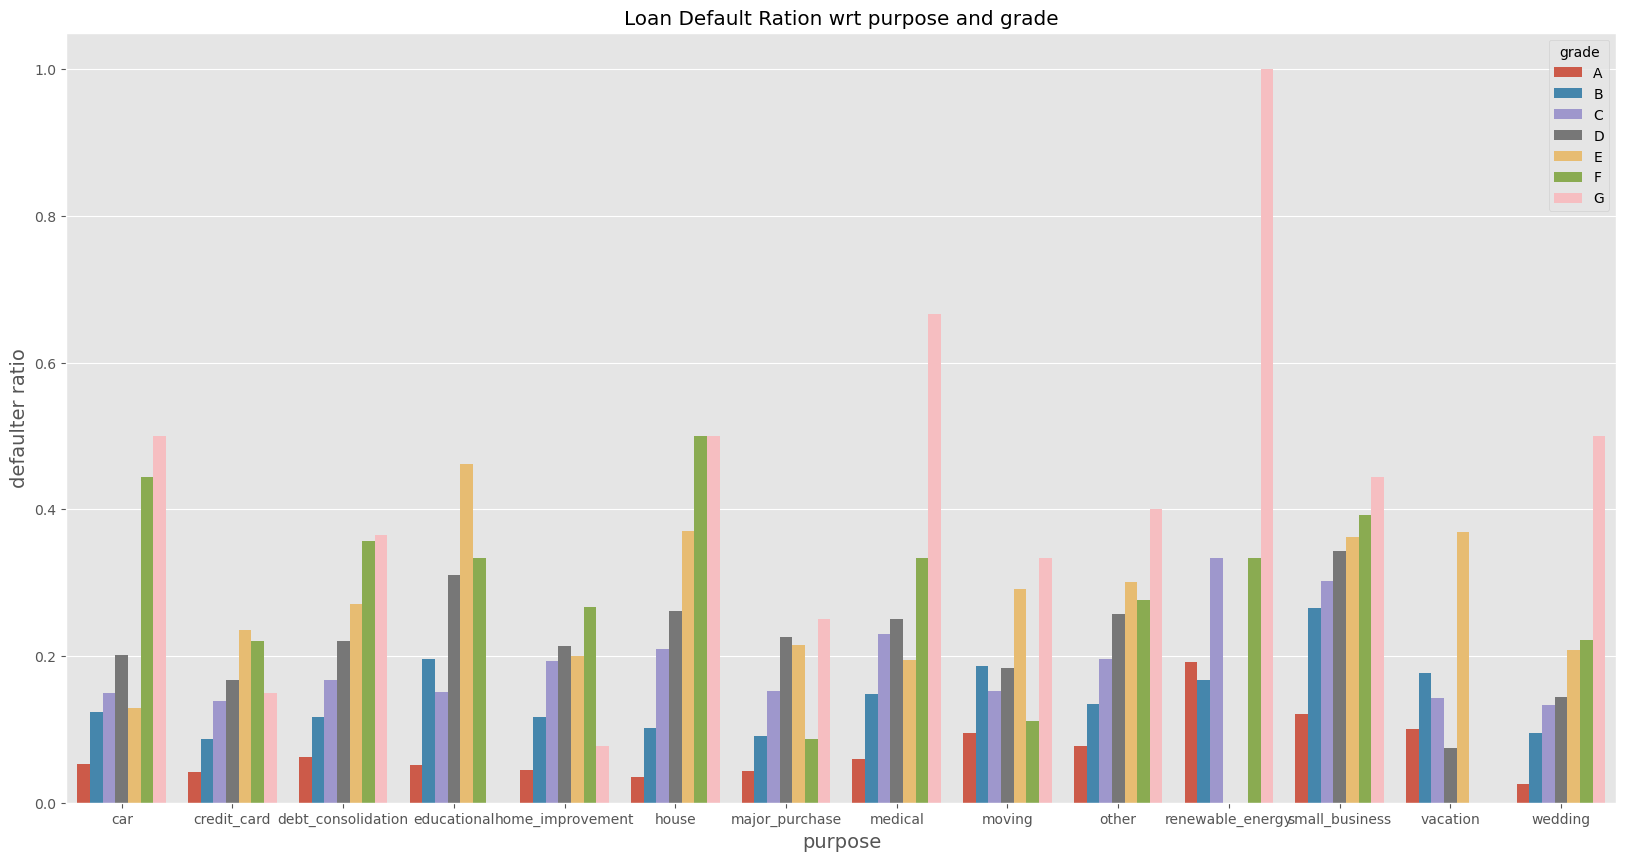

In [145]:
graphPlottingForBivariate("purpose","grade",figsize=(20,10))

#### As per the above graph, people who take laon in every purpose as the grade increases the defaulters ration increases. 

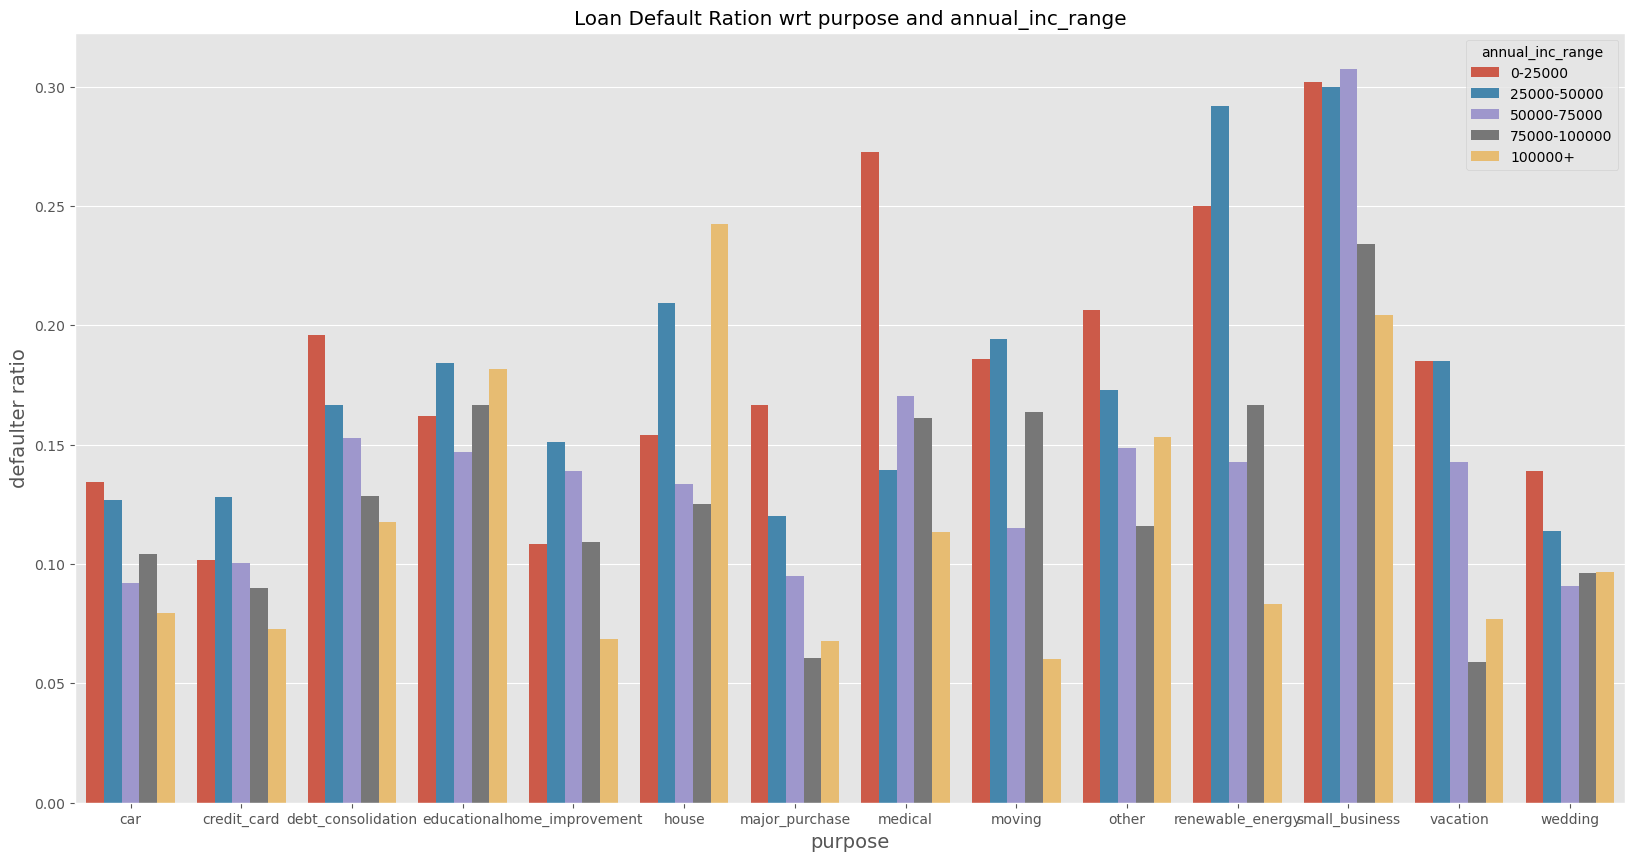

In [146]:
graphPlottingForBivariate("purpose","annual_inc_range", figsize=(20,10))

#### As per the above graph, for almost every purpose as the annual income increases, defaulters ratio decreases. 

## Analysing the spread of variable using Box Plot


In [147]:
def boxPlotting(x,y,data=df,hue="loan_status",figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=x,y=y,data=data,hue=hue, order=sorted(data[x].unique()))
    plt.title(f"Boxplot between {x} and {y} for {hue}")
    plt.xlabel(x,fontsize=14)
    plt.ylabel(y,fontsize=14)
    plt.show()

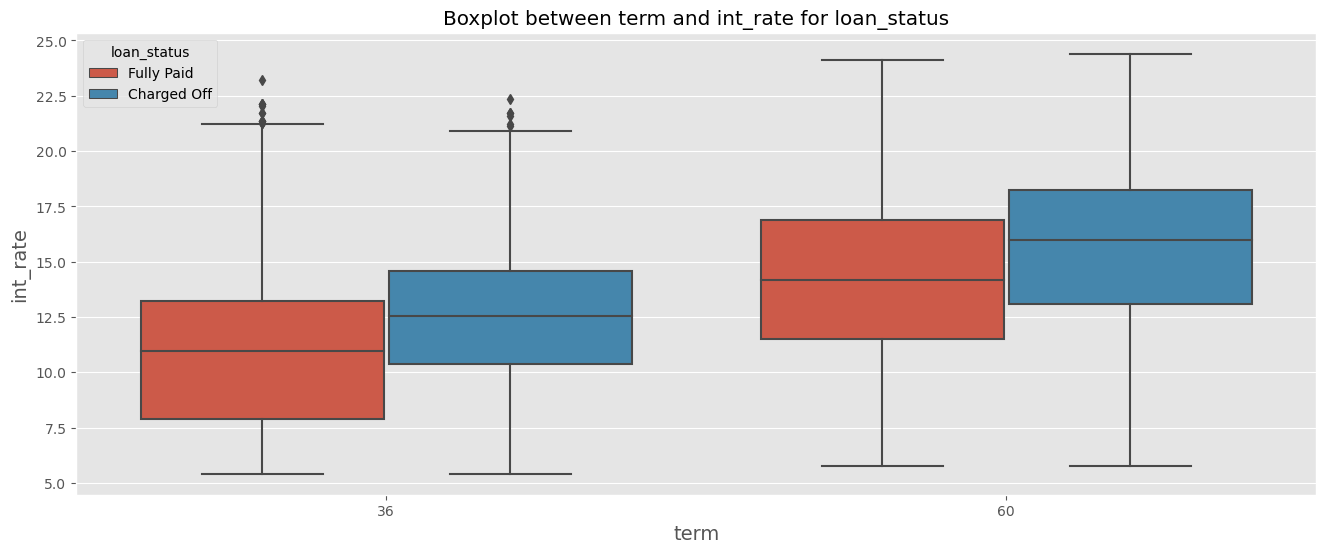

In [148]:
boxPlotting("term","int_rate")

#### As visible in the above graph, the interest rate is higher for 60 term loan. Moreover, interest rate is also higher for the people who are defaulters. 

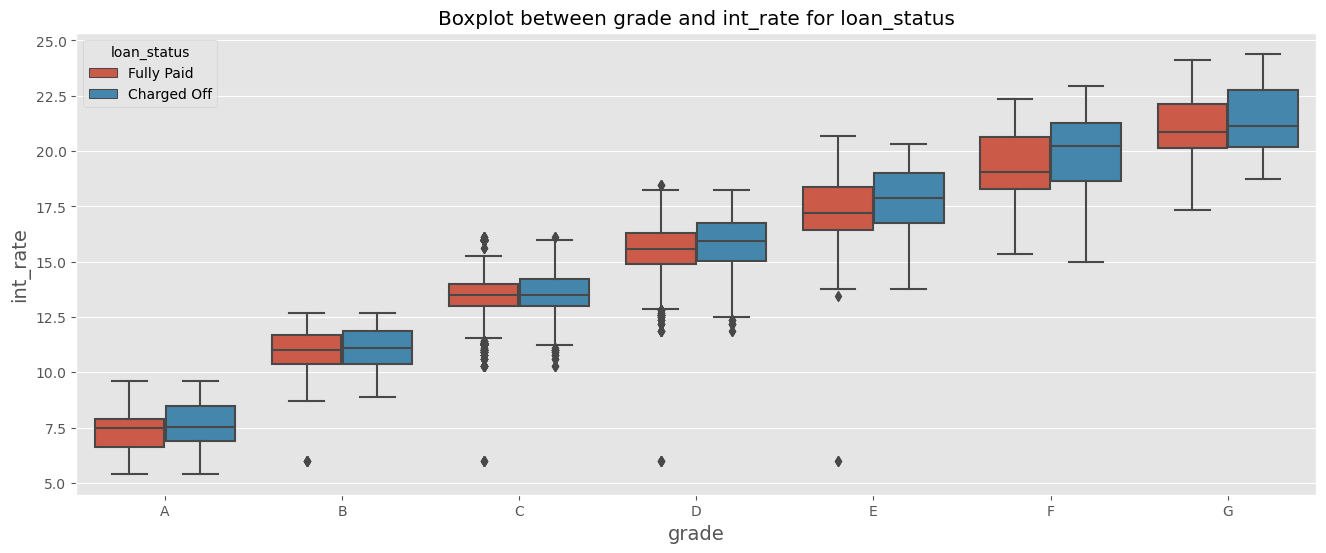

In [149]:
boxPlotting("grade","int_rate")

#### As evident from the above graph, as the grade increase then the interest rate increases. Furthermore, the interest rate for the defaulted person in generally in all the grades. 

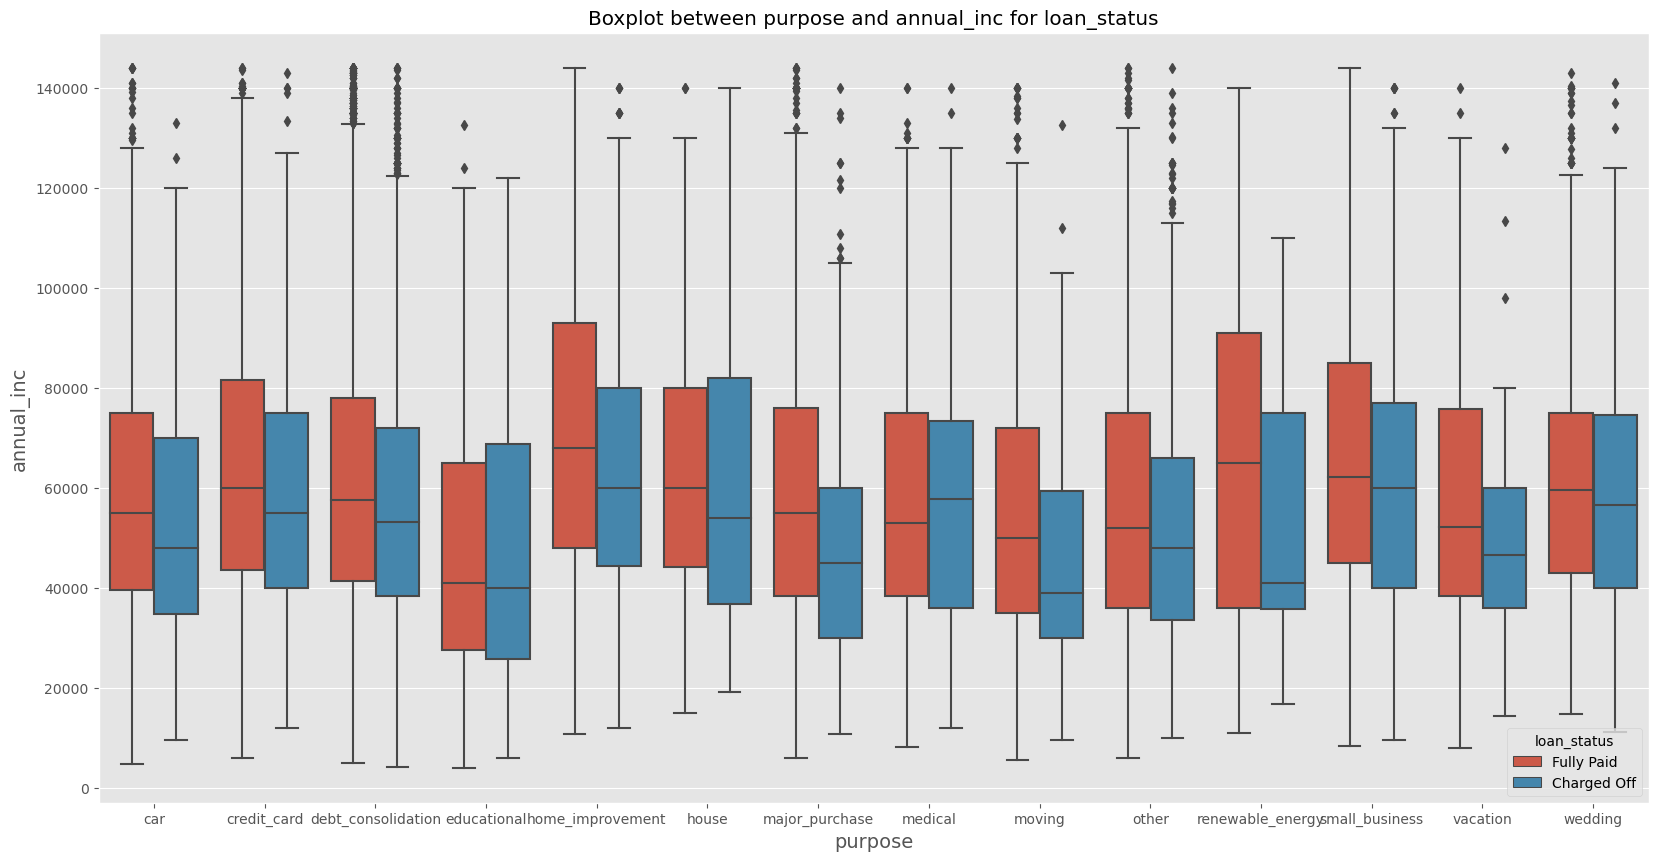

In [150]:
boxPlotting("purpose","annual_inc",figsize=(20,10))

#### As evident from the above graph, there is not clear pattern visible in the boxplot between the annual income with respect to the purpose for which the loan is taken.

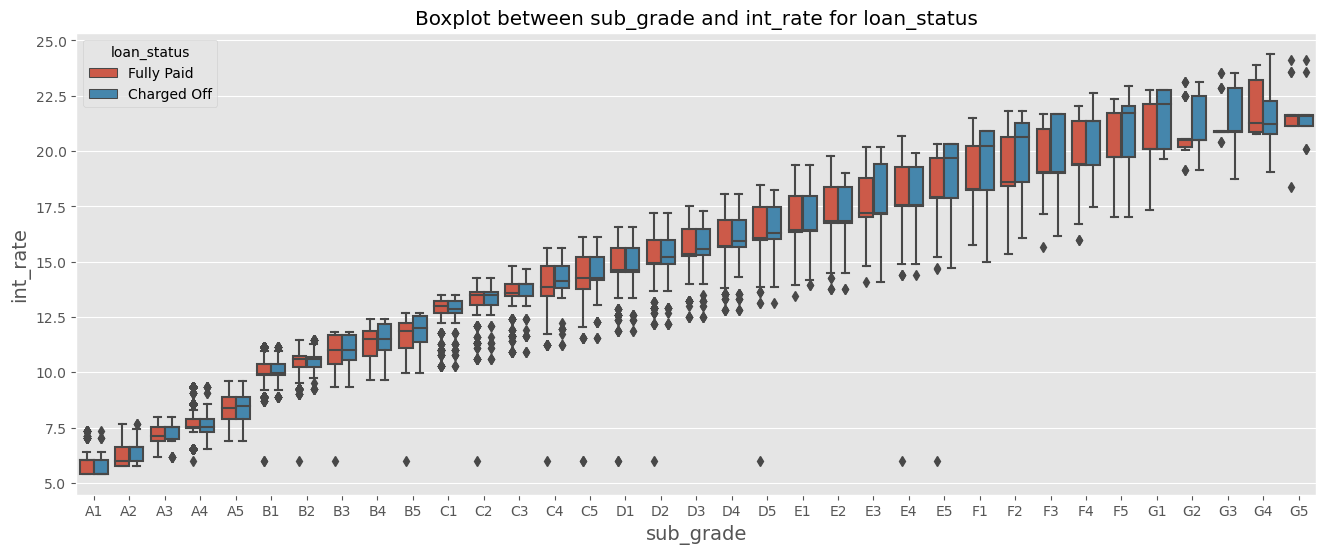

In [151]:
boxPlotting("sub_grade","int_rate")

#### As evident from the above graph, as the level of the sub grade increases the interest rate increases. 

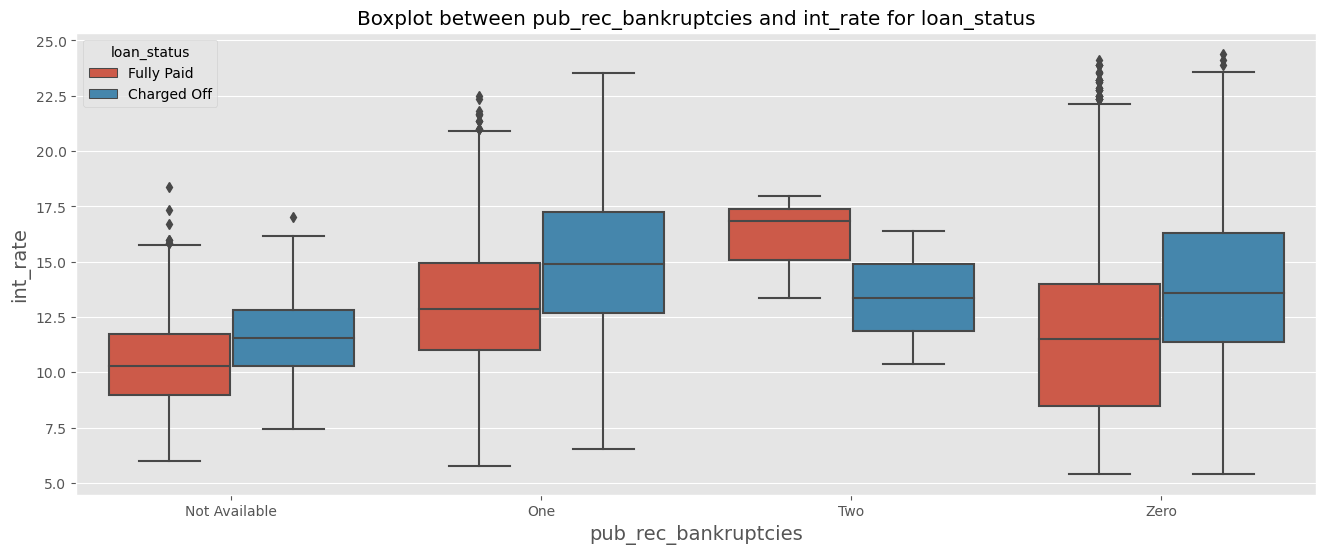

In [152]:
boxPlotting("pub_rec_bankruptcies","int_rate")

#### As evident from the above graph, as the public record of bankruptcies increase the interest rate also increases. 

## Multivariate Analysis Heat Map 

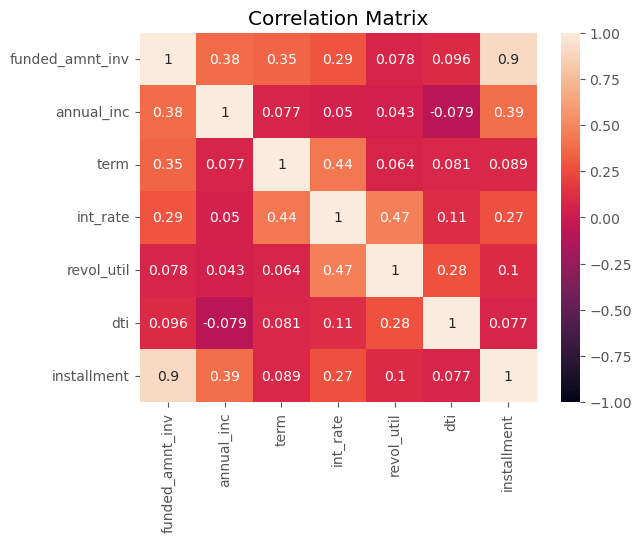

In [153]:
continous_features= ["funded_amnt_inv","annual_inc","term","int_rate","revol_util","dti","installment"]
correlation=df[continous_features].corr()
sns.heatmap(correlation,vmin=-1.0,vmax=1.0,annot=True)
plt.title("Correlation Matrix")
plt.show()

## Conclusion:-

### Based on the univariate, bivariate and multivariate analysis. Following are the driving factors or variables which would affect whether a person would default on loan or not. 

1. Interest Rate-Higher Interest rate, high chances of default
2. Loan Term- Higher the loan term higher chances of default.
3. Purpose- People who take loan for small businesses have higher chances of default. 
4. Annual Income- As the Annaul income increases the chance of default decreases.
5. Revol Until- As the revol until percentge increases, the chances of default also increases.
6. Grade- As the grade increases the chances of default also increases.
7. Installement:- As the installement increases the chances of default also increases. 
8. DTI: As the debt to income ratio increases the chances of default also increases. 